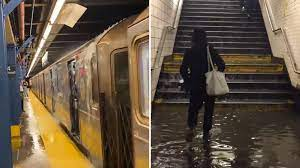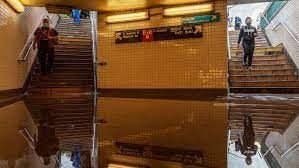

#Weather Impact on NYC Subway Traffic: A Rainfall Classifier

Is it possible to predict rainfall? This question revolves around the capability of anticipating upcoming precipitation events. Advances in meteorological science and technology have enabled the development of sophisticated models and tools that analyze atmospheric conditions to make reasonably accurate predictions. These methods involve monitoring various meteorological parameters, such as humidity, temperature, and wind patterns. While no prediction is entirely foolproof, the continuous improvement of forecasting techniques has significantly enhanced our ability to anticipate rain and other weather phenomena.

In [164]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [165]:
df=pd.read_csv('/content/nyc_subway_weather.csv')
df

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42644,R464,05-31-11,04:00:00,567311,132804,0.0,0.0,2011-05-31 04:00:00,4,1,...,30.14,0,73.0,6.9,0.0,30.168333,75.366667,7.10,40.660004,-73.844849
42645,R464,05-31-11,08:00:00,290767,59788,0.0,0.0,2011-05-31 08:00:00,8,1,...,30.19,0,80.1,6.9,0.0,30.168333,75.366667,7.10,40.660004,-73.844849
42646,R464,05-31-11,12:00:00,419894,95280,0.0,0.0,2011-05-31 12:00:00,12,1,...,30.20,0,81.0,10.4,0.0,30.168333,75.366667,7.10,40.660004,-73.844849
42647,R464,05-31-11,16:00:00,419894,95280,0.0,0.0,2011-05-31 16:00:00,16,1,...,30.17,0,77.0,13.8,0.0,30.168333,75.366667,7.10,40.660004,-73.844849


In [166]:
df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [167]:
df.head(1)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [168]:
df.dtypes

UNIT                object
DATEn               object
TIMEn               object
ENTRIESn             int64
EXITSn               int64
ENTRIESn_hourly    float64
EXITSn_hourly      float64
datetime            object
hour                 int64
day_week             int64
weekday              int64
station             object
latitude           float64
longitude          float64
conds               object
fog                  int64
precipi            float64
pressurei          float64
rain                 int64
tempi              float64
wspdi              float64
meanprecipi        float64
meanpressurei      float64
meantempi          float64
meanwspdi          float64
weather_lat        float64
weather_lon        float64
dtype: object

In [169]:
df.isnull().sum()

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

In this dataset there are 42649 rows × 27 columns.

Here's a brief overview of the columns:

1. Subway Information

  1. 1 'UNIT': Represents the subway unit. It is an 'object' type data. There is no null value.

  1. 2 'DATEn': Represents the date. It is an 'object' type data. There is no null value.

  1. 3 'TIMEn': Represents the time. It is an 'object' type data. There is no null value.

  1. 4 'ENTRIESn': Represents the total number of Subway entries at a specific time. It is an 'int64' type data. There is no null value.

  1. 5 'EXITSn': Represents the total number of Subway exits at a specific time. It is an 'int64' type data. There is no null value.

  1. 6 'ENTRIESn_hourly': Represents the number of Subway entries within a specific hour. It is an 'float64' type data. There is no null value.

  1. 7 'EXITSn_hourly': Represents the number of subway exits within a specific hour. It is an 'float64' type data. There is no null value.

  1. 8 'datetime': Represents the combined date and time. It is an 'object' type data. There is no null value.

2. Time-related Information:

  2. 1 'hour': Represents the hour of the day. It is an 'int64' type data. There is no null value.

  2. 2 'day_week': Represents the day of the week. It is an 'int64' type data. There is no null value.

 2. 3 'weekday': Represents whether it's a weekday or not. It is an 'int64' type data. There is no null value.

3. Subway Location Information:

  3. 1 'station': Represents the subway station. It is an 'object' type data. There is no null value.

  3. 2 'latitude': Represents the latitude of the station. It is an 'float64' type data. There is no null value.

  3. 3 'longitude': Represents the longitude of the station. It is an 'float64' type data. There is no null value.

4. Weather Information:

  4.1 'conds': Represents the weather conditions. It is an 'object' type data. There is no null value.

  4.2 'fog': Represents whether there's fog or not. It is an 'int64' type data. There is no null value.

  4.3 'precipi': Represents the precipitation in inches. It is an 'float64' type data. There is no null value.

  4.4 'pressurei': Represents the atmospheric pressure. It is an 'float64' type data. There is no null value.

  4.5 'rain': Represents whether it's raining or not. It is an 'int64' type data. There is no null value.

  4.6 'tempi': Represents the temperature in Fahrenheit. It is an 'float64' type data. There is no null value.

  4.7 'wspdi': Represents the wind speed. It is an 'float64' type data. There is no null value.

  4.8 'meanprecipi': Represents the mean precipitation. It is an 'float64' type data. There is no null value.

  4.9 'meanpressurei': Represents the mean atmospheric pressure. It is an 'float64' type data. There is no null value.

  4.10 'meantempi': Represents the mean temperature. It is an 'float64' type data. There is no null value.

  4.11 'meanwspdi': Represents the mean wind speed. It is an 'float64' type data. There is no null value.

  4.12 'weather_lat': Represents the latitude for weather information. It is an 'float64' type data. There is no null value.

  4.13 'weather_lon': Represents the longitude for weather information. It is an 'float64' type data. There is no null value.

1. The 'conds' variable, characterized by an 'object' data type. Here are two graph 'Weather Conditions Pie Chart'  'Weather Conditions Histogram'.

In [170]:
set(df['conds'])

{'Clear',
 'Fog',
 'Haze',
 'Heavy Rain',
 'Light Drizzle',
 'Light Rain',
 'Mist',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Rain',
 'Scattered Clouds'}

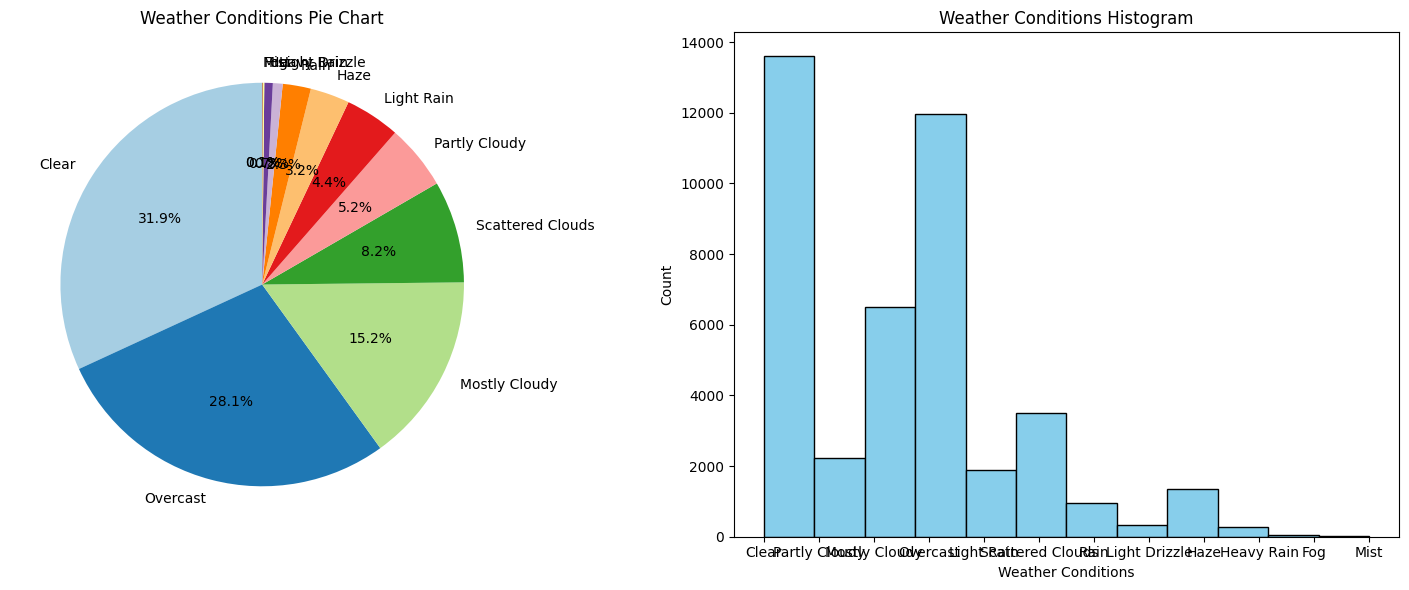

In [171]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Pie Chart
weather_counts = df['conds'].value_counts()
labels = weather_counts.index
sizes = weather_counts.values
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
axs[0].set_title('Weather Conditions Pie Chart')

# Plotting Histogram
axs[1].hist(df['conds'], edgecolor='black', color='skyblue', bins=len(weather_counts))
axs[1].set_title('Weather Conditions Histogram')
axs[1].set_xlabel('Weather Conditions')
axs[1].set_ylabel('Count')
#axs[1].tick_params(axis='x', rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


2. The 'fog' variable, characterized by an 'int64' data type, is binary in nature, representing either the presence (1) or absence (0) of fog.

In [172]:
print(f"Unique values: {set(df['fog'])}")
print(f"Total Unique values: {len(set(df['fog']))}")

Unique values: {0, 1}
Total Unique values: 2


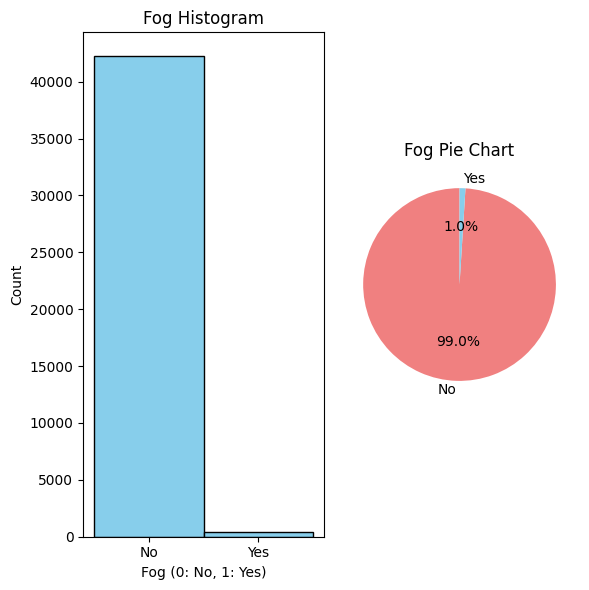

In [173]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 6))

# Plotting Histogram
axs[0].hist(df['fog'], bins=[-0.5, 0.5, 1.5], edgecolor='black', color='skyblue')
axs[0].set_title('Fog Histogram')
axs[0].set_xlabel('Fog (0: No, 1: Yes)')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])

# Plotting Pie Chart
labels = ['No', 'Yes']
sizes = df['fog'].value_counts()
colors = ['lightcoral', 'skyblue']
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[1].set_title('Fog Pie Chart')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

The histogram depicting 'Fog indicates that the total count for 'No' is greater than 'Yes.' Specifically, in the 'Fog pie chart, it is evident that 99.0% of the data points correspond to 'No,' while 'Yes' constitutes 1%.

3. For 'precipi', which is 'float64' data type.

In [174]:
print(f"Unique values: {set(df['precipi'])}")
print(f"Total Unique values: {len(set(df['precipi']))}")

Unique values: {0.0, 0.08, 0.03, 0.05, 0.3, 0.07, 0.06, 0.21, 0.15, 0.01, 0.02}
Total Unique values: 11


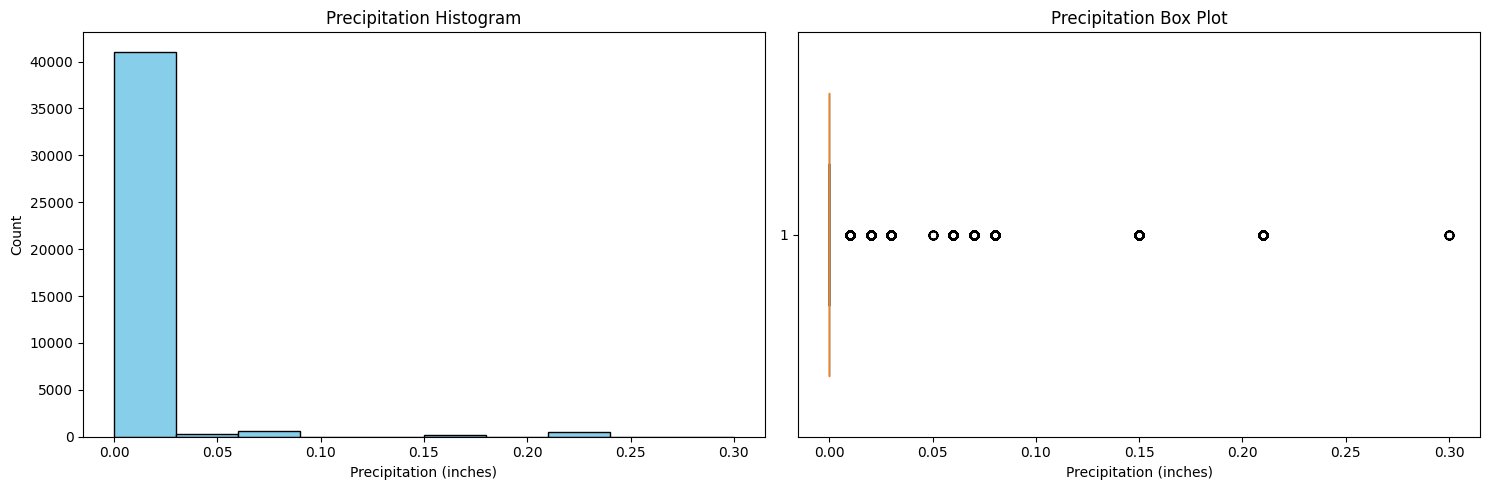

In [175]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Histogram
axs[0].hist(df['precipi'], bins=10, edgecolor='black', color='skyblue')
axs[0].set_title('Precipitation Histogram')
axs[0].set_xlabel('Precipitation (inches)')
axs[0].set_ylabel('Count')

# Plotting Box Plot
axs[1].boxplot(df['precipi'], vert=False, widths=0.7, patch_artist=True)
axs[1].set_title('Precipitation Box Plot')
axs[1].set_xlabel('Precipitation (inches)')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [176]:
# Calculate quartiles
Q1 = df['precipi'].quantile(0.25)
Q3 = df['precipi'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['precipi'] < lower_bound) | (df['precipi'] > upper_bound)).sum()

print(f'Number of outliers: {outliers_count}')

Number of outliers: 2822


In [177]:
# Calculate quartiles
Q1 = df['precipi'].quantile(0.25)
Q3 = df['precipi'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['precipi'] >= lower_bound) & (df['precipi'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
39827


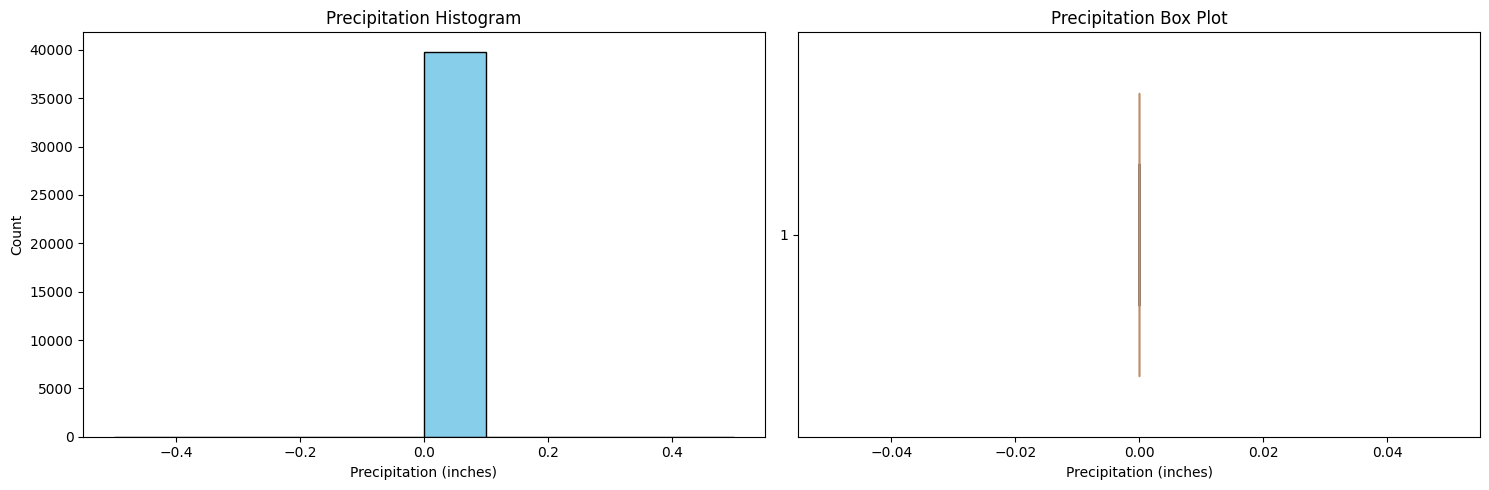

In [178]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Histogram
axs[0].hist(df['precipi'], bins=10, edgecolor='black', color='skyblue')
axs[0].set_title('Precipitation Histogram')
axs[0].set_xlabel('Precipitation (inches)')
axs[0].set_ylabel('Count')

# Plotting Box Plot
axs[1].boxplot(df['precipi'], vert=False, widths=0.7, patch_artist=True)
axs[1].set_title('Precipitation Box Plot')
axs[1].set_xlabel('Precipitation (inches)')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In Histogram the amount is 0.0-0.3.

In [179]:
df.shape

(39827, 27)

4. For the 'pressurei' data, which is of float type, outliers will have been removed if there will be. Subsequently, visualizations, including Histogram, and Box Plots, can offer insights into the refined distribution of the data.

In [180]:
len(set(df['pressurei']))

71

In 'pressurei' column, there are 71 unique values.

In [181]:
df['pressurei'].describe()

count    39827.000000
mean        29.975752
std          0.138800
min         29.550000
25%         29.890000
50%         29.960000
75%         30.060000
max         30.320000
Name: pressurei, dtype: float64

In [182]:
print(df['pressurei'].mean())
print(df['pressurei'].median())

29.9757521279534
29.96


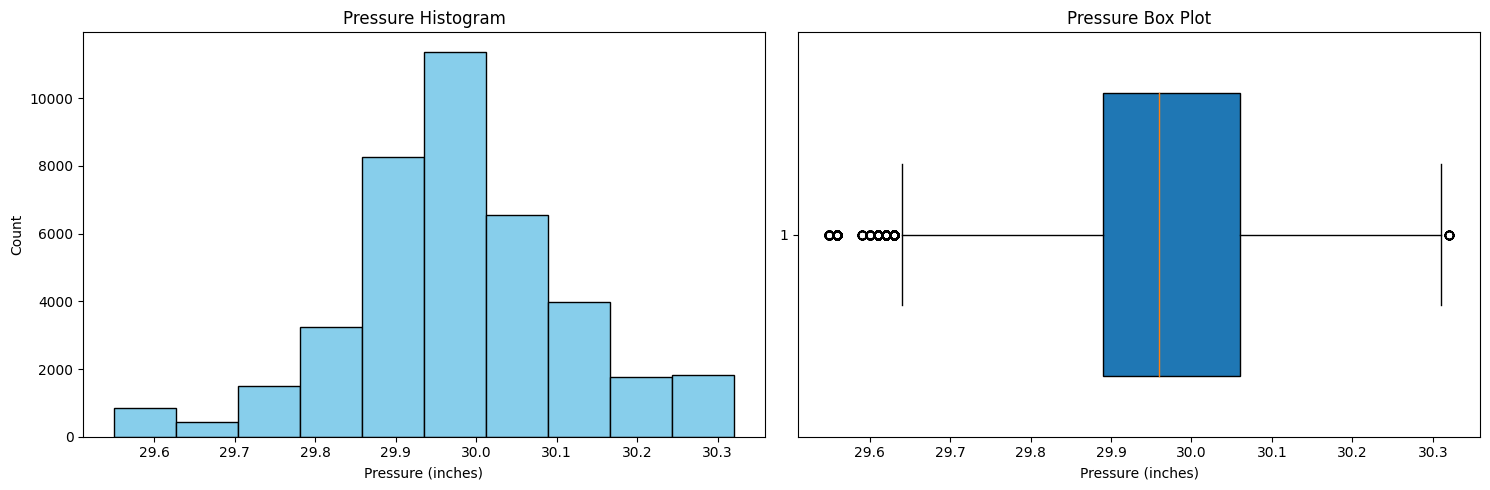

In [183]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Histogram
axs[0].hist(df['pressurei'], bins=10, edgecolor='black', color='skyblue')
axs[0].set_title('Pressure Histogram')
axs[0].set_xlabel('Pressure (inches)')
axs[0].set_ylabel('Count')

# Plotting Box Plot
axs[1].boxplot(df['pressurei'], vert=False, widths=0.7, patch_artist=True)
axs[1].set_title('Pressure Box Plot')
axs[1].set_xlabel('Pressure (inches)')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


The distribution of the 'pressurei' data closely resembles a normal distribution, as depicted in the 'Pressure Histogram.' However, the 'Pressure Box Plot' reveals the presence of outliers that may impact the overall representation of the data.

In [184]:
# Calculate quartiles
Q1 = df['pressurei'].quantile(0.25)
Q3 = df['pressurei'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['pressurei'] < lower_bound) | (df['pressurei'] > upper_bound)).sum()

print(f'Number of outliers: {outliers_count}')


Number of outliers: 1073


There are total 1073 outliers.

In [185]:
# Calculate quartiles
Q1 = df['pressurei'].quantile(0.25)
Q3 = df['pressurei'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['pressurei'] >= lower_bound) & (df['pressurei'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))


DataFrame without outliers:
38754


After removed outliers there are 38754 rows.

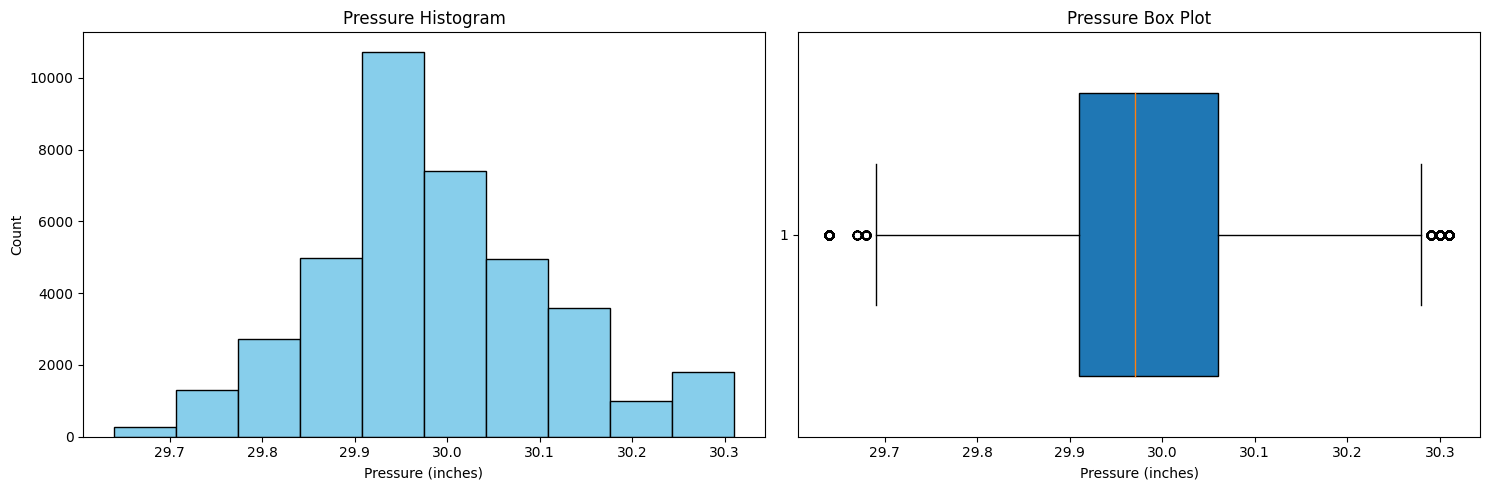

In [186]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Histogram
axs[0].hist(df['pressurei'], bins=10, edgecolor='black', color='skyblue')
axs[0].set_title('Pressure Histogram')
axs[0].set_xlabel('Pressure (inches)')
axs[0].set_ylabel('Count')

# Plotting Box Plot
axs[1].boxplot(df['pressurei'], vert=False, widths=0.7, patch_artist=True)
axs[1].set_title('Pressure Box Plot')
axs[1].set_xlabel('Pressure (inches)')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

After removing outliers the 'Pressure Histogram' and the 'Pressure Box Plot' looking very good.

In [187]:
df.shape

(38754, 27)


5. Pie chart and histogram groupby 'rain'.

In [188]:
print(set(df['rain']))
print(f"'1' total: {(df['rain']==1).sum()}")
print(f"'0' total: {(df['rain']==0).sum()}")

{0, 1}
'1' total: 5797
'0' total: 32957


The 'rain' column is a binary data. '0' for not rain '1' for rain. Here total '1' is total 5797 and '0' is total 32957.

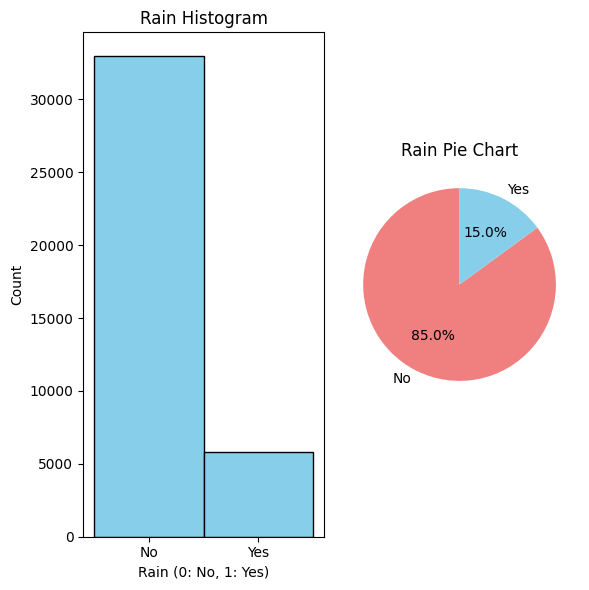

In [189]:

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 6))

# Plotting Histogram
axs[0].hist(df['rain'], bins=[-0.5, 0.5, 1.5], edgecolor='black', color='skyblue')
axs[0].set_title('Rain Histogram')
axs[0].set_xlabel('Rain (0: No, 1: Yes)')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])

# Plotting Pie Chart
labels = ['No', 'Yes']
sizes = df['rain'].value_counts()
colors = ['lightcoral', 'skyblue']
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[1].set_title('Rain Pie Chart')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


The histogram depicting rainfall indicates that the total count for 'No' is greater than 'Yes.' Specifically, in the rain pie chart, it is evident that 85.0% of the data points correspond to 'No,' while 'Yes' constitutes 15.0%.

6. 'tempi'



In [190]:
df['tempi']

0        55.9
1        52.0
2        62.1
3        57.9
4        52.0
         ... 
42644    73.0
42645    80.1
42646    81.0
42647    77.0
42648    69.1
Name: tempi, Length: 38754, dtype: float64

In [191]:
print(df['tempi'].mean())
print(df['tempi'].median())

63.572970532074116
62.1


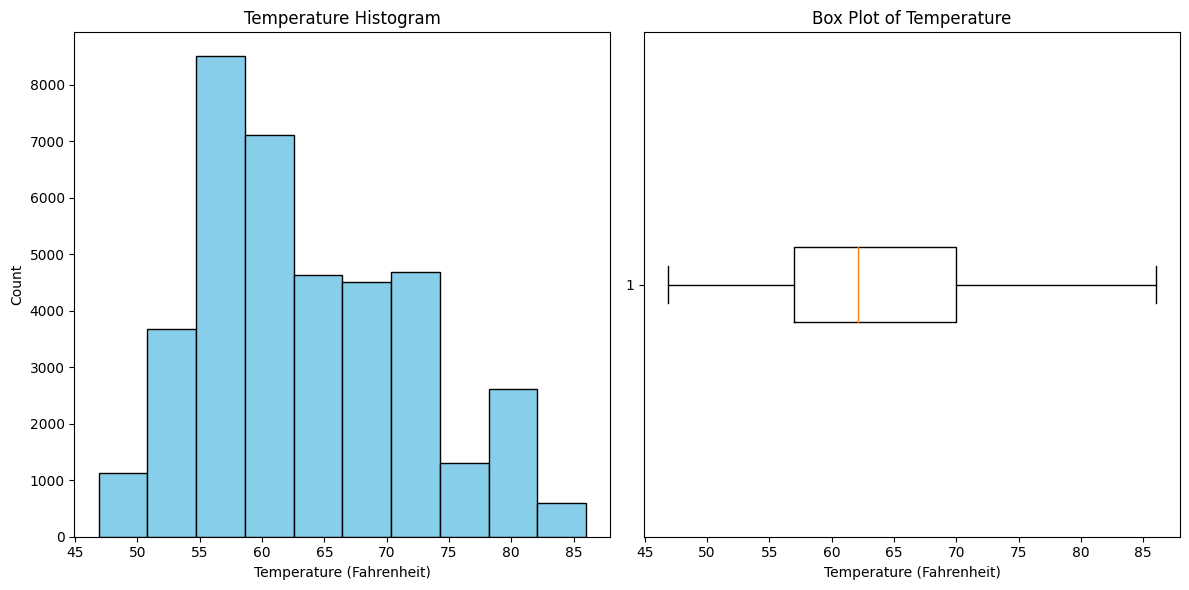

In [192]:

# Plotting Histogram and Box Plot
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['tempi'], bins=10, edgecolor='black', color='skyblue')
plt.title('Temperature Histogram')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count')

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(df['tempi'], vert=False)
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature (Fahrenheit)')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [193]:
# Calculate quartiles
Q1 = df['tempi'].quantile(0.25)
Q3 = df['tempi'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['tempi'] < lower_bound) | (df['tempi'] > upper_bound)).sum()

print(f'Number of outliers: {outliers_count}')

Number of outliers: 0


In [194]:
df.shape

(38754, 27)

7. 'wspdi'

In [195]:
df['wspdi']

0         3.5
1         3.5
2         6.9
3        15.0
4        10.4
         ... 
42644     6.9
42645     6.9
42646    10.4
42647    13.8
42648     4.6
Name: wspdi, Length: 38754, dtype: float64

In [196]:
print(df['wspdi'].mean())
print(df['wspdi'].median())

6.745368220054704
6.9


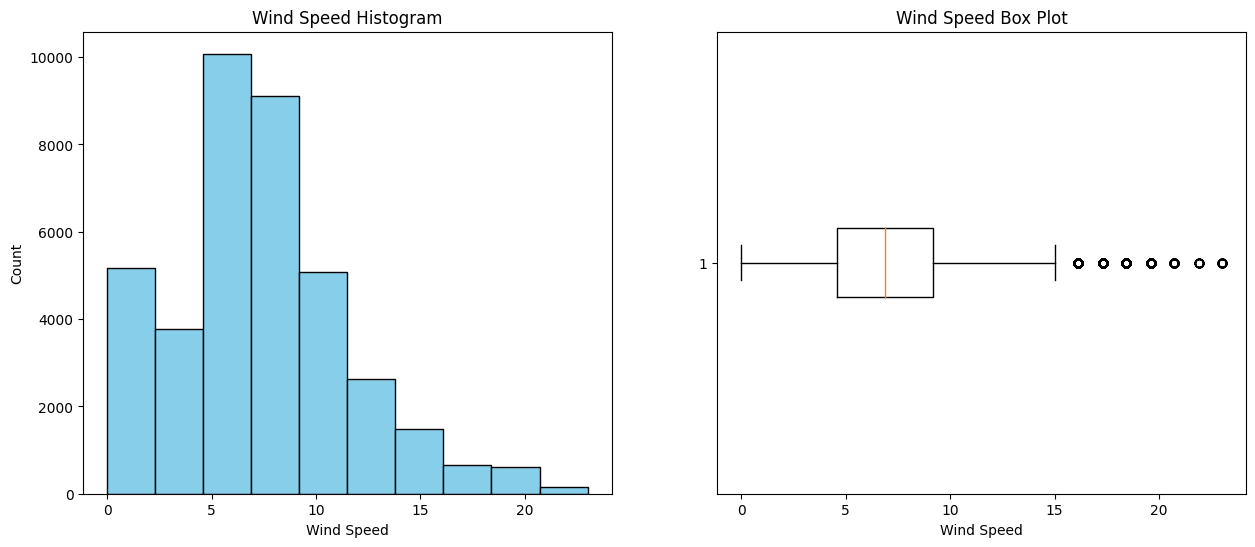

In [197]:

# Plotting Histogram and Box Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram
axes[0].hist(df['wspdi'], bins=10, edgecolor='black', color='skyblue')
axes[0].set_title('Wind Speed Histogram')
axes[0].set_xlabel('Wind Speed')
axes[0].set_ylabel('Count')

# Box Plot
axes[1].boxplot(df['wspdi'], vert=False)
axes[1].set_title('Wind Speed Box Plot')
axes[1].set_xlabel('Wind Speed')

plt.show()



In [198]:
# Calculate quartiles
Q1 = df['wspdi'].quantile(0.25)
Q3 = df['wspdi'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['wspdi'] < lower_bound) | (df['wspdi'] > upper_bound)).sum()

print(f'Number of outliers: {outliers_count}')


Number of outliers: 1415


In [199]:
# Calculate quartiles
Q1 = df['wspdi'].quantile(0.25)
Q3 = df['wspdi'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['wspdi'] >= lower_bound) & (df['wspdi'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
37339


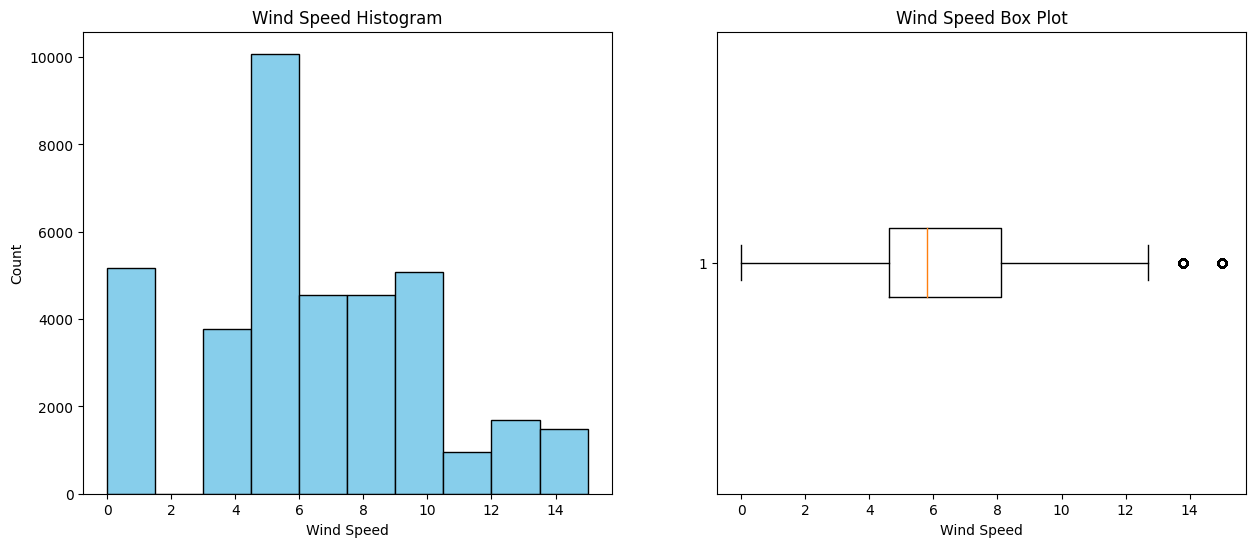

In [200]:

# Plotting Histogram and Box Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram
axes[0].hist(df['wspdi'], bins=10, edgecolor='black', color='skyblue')
axes[0].set_title('Wind Speed Histogram')
axes[0].set_xlabel('Wind Speed')
axes[0].set_ylabel('Count')

# Box Plot
axes[1].boxplot(df['wspdi'], vert=False)
axes[1].set_title('Wind Speed Box Plot')
axes[1].set_xlabel('Wind Speed')

plt.show()

In [201]:
df.shape

(37339, 27)

In [202]:
df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [203]:
columns_to_drop = ['UNIT','DATEn','TIMEn','ENTRIESn','EXITSn','ENTRIESn_hourly',
       'EXITSn_hourly','datetime','hour','day_week','weekday','station',
       'latitude','longitude','meanprecipi','meanpressurei','meantempi',
       'meanwspdi','weather_lat','weather_lon']

columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df= df.drop(columns=columns_to_drop_existing, inplace=False)

print(df)

               conds  fog  precipi  pressurei  rain  tempi  wspdi
0              Clear    0      0.0      30.22     0   55.9    3.5
1      Partly Cloudy    0      0.0      30.25     0   52.0    3.5
2      Mostly Cloudy    0      0.0      30.28     0   62.1    6.9
3      Mostly Cloudy    0      0.0      30.26     0   57.9   15.0
4      Mostly Cloudy    0      0.0      30.28     0   52.0   10.4
...              ...  ...      ...        ...   ...    ...    ...
42644  Partly Cloudy    0      0.0      30.14     0   73.0    6.9
42645          Clear    0      0.0      30.19     0   80.1    6.9
42646          Clear    0      0.0      30.20     0   81.0   10.4
42647          Clear    0      0.0      30.17     0   77.0   13.8
42648          Clear    0      0.0      30.18     0   69.1    4.6

[37339 rows x 7 columns]


In [204]:
df.columns


Index(['conds', 'fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi'], dtype='object')

In [205]:
set(df['conds'])

{'Clear',
 'Fog',
 'Haze',
 'Light Drizzle',
 'Light Rain',
 'Mist',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Rain',
 'Scattered Clouds'}

In [206]:
# Assuming df is your DataFrame and 'conds' is the column to be encoded
le = LabelEncoder()
df['conds_encoded'] = le.fit_transform(df['conds'])


In [207]:
df= pd.get_dummies(df, columns=['conds'], prefix='conds')
df.head(1)

,fog,precipi,pressurei,rain,tempi,wspdi,conds_encoded,conds_Clear,conds_Fog,conds_Haze,conds_Light Drizzle,conds_Light Rain,conds_Mist,conds_Mostly Cloudy,conds_Overcast,conds_Partly Cloudy,conds_Rain,conds_Scattered Clouds
0,0,0.0,30.22,0,55.9,3.5,0,1,0,0,0,0,0,0,0,0,0,0


In [208]:
df.columns

Index(['fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi',
       'conds_encoded', 'conds_Clear', 'conds_Fog', 'conds_Haze',
       'conds_Light Drizzle', 'conds_Light Rain', 'conds_Mist',
       'conds_Mostly Cloudy', 'conds_Overcast', 'conds_Partly Cloudy',
       'conds_Rain', 'conds_Scattered Clouds'],
      dtype='object')

In [209]:
columns_to_drop = ['conds_Clear', 'conds_Fog', 'conds_Haze',
       'conds_Heavy Rain', 'conds_Light Drizzle', 'conds_Light Rain',
       'conds_Mist', 'conds_Mostly Cloudy', 'conds_Overcast',
       'conds_Partly Cloudy', 'conds_Rain', 'conds_Scattered Clouds']

columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df= df.drop(columns=columns_to_drop_existing, inplace=False)

print(df)

       fog  precipi  pressurei  rain  tempi  wspdi  conds_encoded
0        0      0.0      30.22     0   55.9    3.5              0
1        0      0.0      30.25     0   52.0    3.5              8
2        0      0.0      30.28     0   62.1    6.9              6
3        0      0.0      30.26     0   57.9   15.0              6
4        0      0.0      30.28     0   52.0   10.4              6
...    ...      ...        ...   ...    ...    ...            ...
42644    0      0.0      30.14     0   73.0    6.9              8
42645    0      0.0      30.19     0   80.1    6.9              0
42646    0      0.0      30.20     0   81.0   10.4              0
42647    0      0.0      30.17     0   77.0   13.8              0
42648    0      0.0      30.18     0   69.1    4.6              0

[37339 rows x 7 columns]


In [210]:
df.columns

Index(['fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi',
       'conds_encoded'],
      dtype='object')

In [211]:

X = df[['fog','precipi', 'pressurei', 'wspdi', 'conds_encoded', 'tempi']]
y = df['rain']

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6350
           1       0.83      0.16      0.27      1118

    accuracy                           0.87      7468
   macro avg       0.85      0.58      0.60      7468
weighted avg       0.86      0.87      0.83      7468



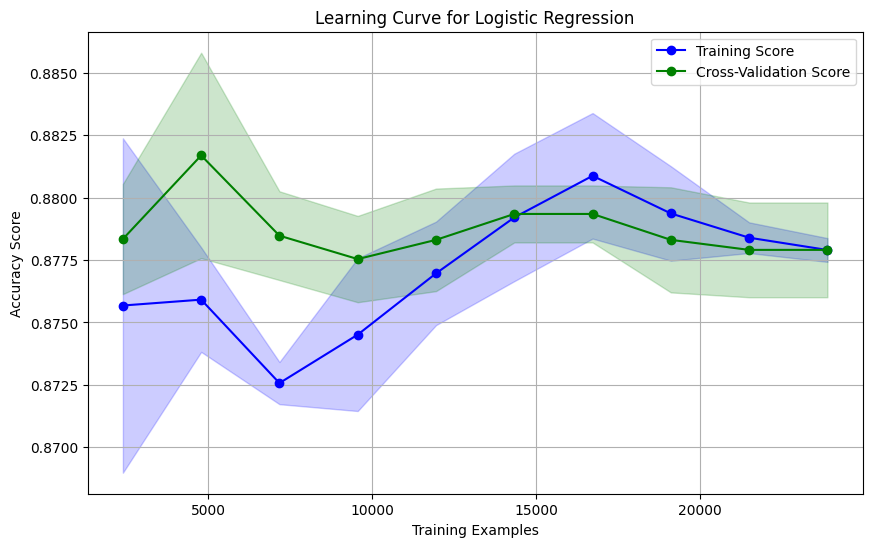

In [212]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Accuracy: 0.8503
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      6350
           1       0.00      0.00      0.00      1118

    accuracy                           0.85      7468
   macro avg       0.43      0.50      0.46      7468
weighted avg       0.72      0.85      0.78      7468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


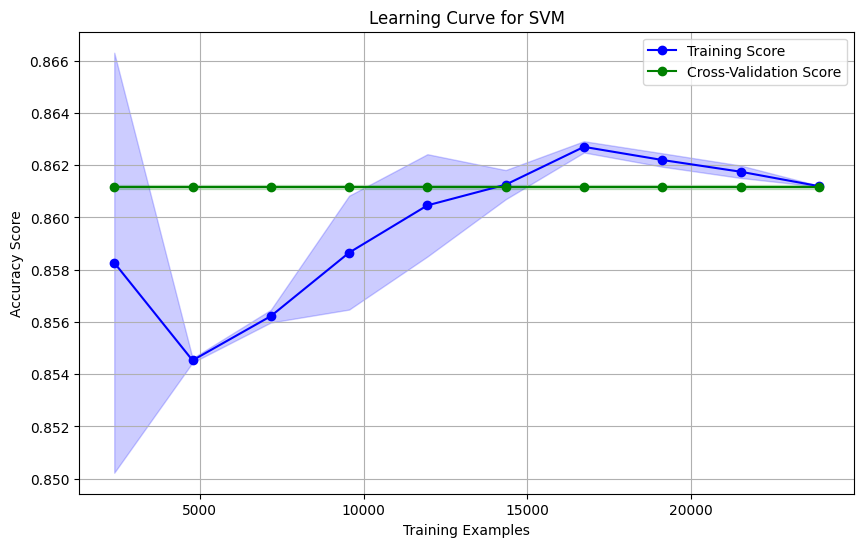

In [213]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for SVM')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Accuracy: 0.9977
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6350
           1       0.99      1.00      0.99      1118

    accuracy                           1.00      7468
   macro avg       0.99      1.00      1.00      7468
weighted avg       1.00      1.00      1.00      7468



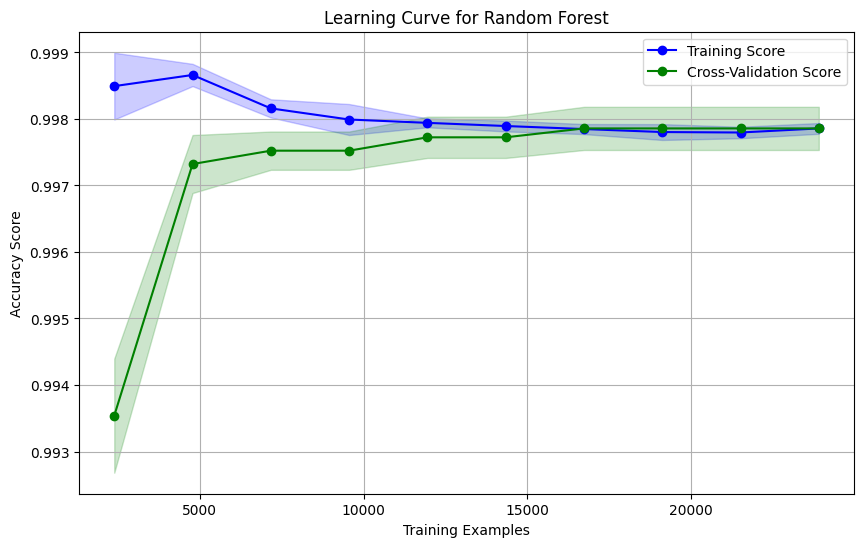

In [214]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Accuracy: 0.9977
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6350
           1       0.99      1.00      0.99      1118

    accuracy                           1.00      7468
   macro avg       0.99      1.00      1.00      7468
weighted avg       1.00      1.00      1.00      7468



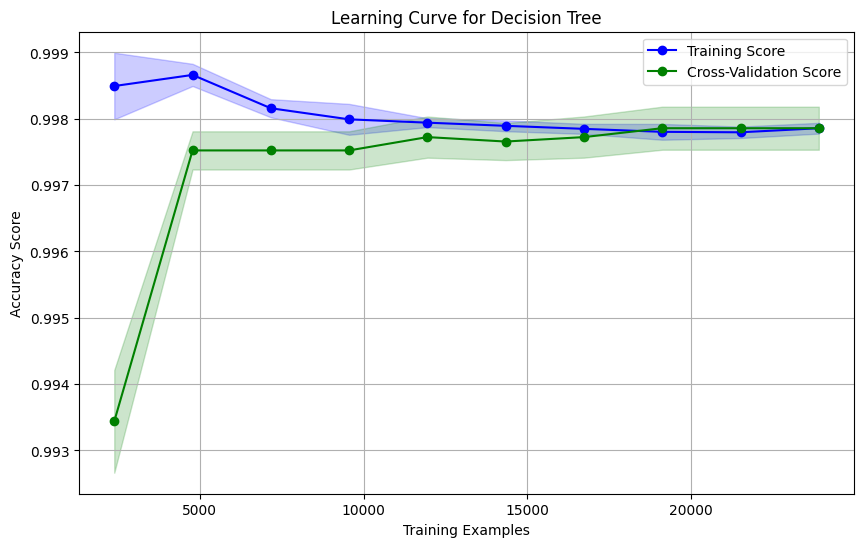

In [215]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


#Conclusion

1. The Logistic Regression model exhibits an impressive accuracy of 87% (0.87), coupled with a notably favorable learning curve.

2. Although the Support Vector Machines (SVM) model achieves an accuracy of 85% (0.85), its learning curve doesn't demonstrate substantial improvement.

3. The Random Forest model stands out with exceptional accuracy, reaching an impressive 99.77% (0.9977), and its learning curve reflects a highly proficient performance.

4. Similarly, the Decision Tree model attains an accuracy of 99.77% (0.99), showcasing perfection in classification, as evident from its flawless learning curve.

In summary, both the Random Forest and Decision Tree models prove to be ideal choices for the dataset, exhibiting near-perfect accuracy and impeccable learning curves.